# Standing Waves Lab
## Experiment 2
### Ming Fong and Cameron Shotwell

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [32]:
df = pd.read_csv('data/Standing Waves Data - Sheet1.csv')
df = df[["2_n", "2_m", "2_m_error", "2_L", "2_L_err", "2_string_l", "2_string_m"]][:6]

In [62]:
df

,2_n,2_m,2_m_error,2_L,2_L_err,2_string_l,2_string_m
0,2.0,0.518,0.005,1.48,0.05,2.983,0.013
1,3.0,0.300,0.005,NaN,NaN,NaN,NaN
2,4.0,0.199,0.005,NaN,NaN,NaN,NaN
3,5.0,0.130,0.005,NaN,NaN,NaN,NaN
4,6.0,0.095,0.005,NaN,NaN,NaN,NaN
5,7.0,0.067,0.005,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Mass vs Harmonic Number')

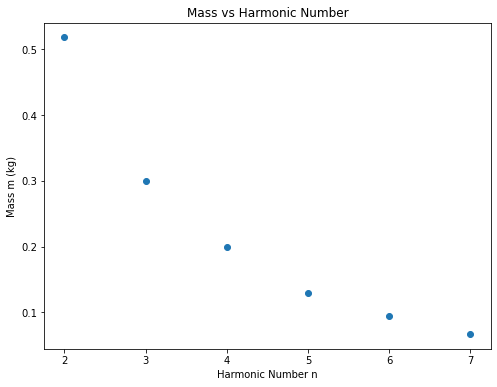

In [63]:
plt.figure(figsize=(8,6))
plt.scatter(df["2_n"], df["2_m"])
plt.xlabel("Harmonic Number n")
plt.ylabel("Mass m (kg)")
plt.title("Mass vs Harmonic Number")

In [73]:
def func_to_fit(n, a):
    return a*(n**2)

In [74]:
params, cov = curve_fit(func_to_fit, df["2_n"], 1 / (df["2_m"]*9.8))
std_errs = np.sqrt(np.diag(cov))
print("params" + str(params))
print("std_errs" + str(std_errs))

params[0.03100998]
std_errs[0.00069266]


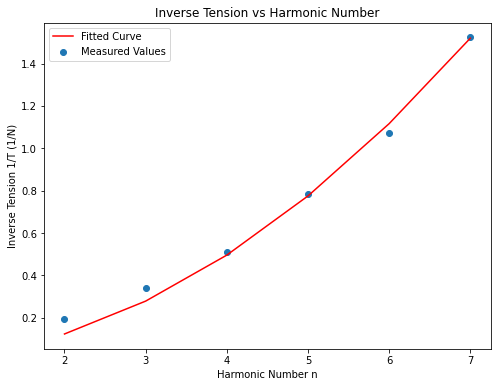

a = 0.031009982800092817 +/- 0.0006926620047465485


In [76]:
ypred = func_to_fit(df["2_n"], *params)

plt.figure(figsize=(8,6))
plt.scatter(df["2_n"], 1 / (df["2_m"]*9.8), label="Measured Values")
plt.plot(df["2_n"], ypred, 'r-', label="Fitted Curve")
plt.legend()
plt.xlabel("Harmonic Number n")
plt.ylabel("Inverse Tension 1/T (1/N)")
plt.title("Inverse Tension vs Harmonic Number")
plt.show()
print("a = " + str(params[0]) + " +/- " + str(std_errs[0]))

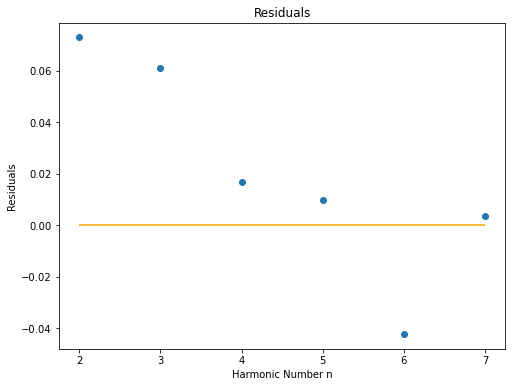

In [79]:
# residuals
residuals = 1 / (df["2_m"]*9.8) - ypred
plt.figure(figsize=(8,6))
plt.scatter(df["2_n"], residuals)
plt.xlabel("Harmonic Number n")
plt.ylabel("Residuals")
plt.title("Residuals")
plt.hlines(0, df["2_n"].min(), df["2_n"].max(), color="orange")
plt.show()

In [80]:
L = 1.48
f = 30
a = params[0]

mu = 1 / (4 * f**2 * L**2 * a)
mu

0.004089521945623395

In [82]:
a_L = 0.05
a_f = 0
a_a = std_errs[0]

a_mu = np.sqrt(a_L**2 * -2 / (4 * f**2 * L**3) + a_f**2 * -2 / (4 * L**2 * f**3) + a_a**2)
a_mu

0.00022660141843881254

In [83]:
# agreement test
abs(mu - 0.00436) < np.sqrt(a_mu**2 + 0.00034**2)

True